In [105]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [106]:
import glob
glob.glob("C:\\Users\\sadee\\Downloads\\S&P_resources\\individual_stocks_5yr/*csv")

['C:\\Users\\sadee\\Downloads\\S&P_resources\\individual_stocks_5yr\\AAL_data.csv',
 'C:\\Users\\sadee\\Downloads\\S&P_resources\\individual_stocks_5yr\\AAPL_data.csv',
 'C:\\Users\\sadee\\Downloads\\S&P_resources\\individual_stocks_5yr\\AAP_data.csv',
 'C:\\Users\\sadee\\Downloads\\S&P_resources\\individual_stocks_5yr\\ABBV_data.csv',
 'C:\\Users\\sadee\\Downloads\\S&P_resources\\individual_stocks_5yr\\ABC_data.csv',
 'C:\\Users\\sadee\\Downloads\\S&P_resources\\individual_stocks_5yr\\ABT_data.csv',
 'C:\\Users\\sadee\\Downloads\\S&P_resources\\individual_stocks_5yr\\ACN_data.csv',
 'C:\\Users\\sadee\\Downloads\\S&P_resources\\individual_stocks_5yr\\ADBE_data.csv',
 'C:\\Users\\sadee\\Downloads\\S&P_resources\\individual_stocks_5yr\\ADI_data.csv',
 'C:\\Users\\sadee\\Downloads\\S&P_resources\\individual_stocks_5yr\\ADM_data.csv',
 'C:\\Users\\sadee\\Downloads\\S&P_resources\\individual_stocks_5yr\\ADP_data.csv',
 'C:\\Users\\sadee\\Downloads\\S&P_resources\\individual_stocks_5yr\\ADSK

In [107]:
top_companies = [
     "C:\\Users\\sadee\\Downloads\\S&P_resources\\individual_stocks_5yr\\AAPL_data.csv",
     "C:\\Users\\sadee\\Downloads\\S&P_resources\\individual_stocks_5yr\\AMZN_data.csv",
     "C:\\Users\\sadee\\Downloads\\S&P_resources\\individual_stocks_5yr\\GOOG_data.csv",
     "C:\\Users\\sadee\\Downloads\\S&P_resources\\individual_stocks_5yr\\MSFT_data.csv"
]

In [108]:
data = pd.DataFrame()
for file in top_companies:
    companies_data = pd.read_csv(file)
    data = pd.concat([companies_data,data],ignore_index=True)

In [109]:
data.shape

(4752, 7)

In [110]:
data.head(10)

,date,open,high,low,close,volume,Name
0,2013-02-08,27.3500,27.71,27.310,27.550,33318306,MSFT
1,2013-02-11,27.6500,27.92,27.500,27.860,32247549,MSFT
2,2013-02-12,27.8800,28.00,27.750,27.880,35990829,MSFT
3,2013-02-13,27.9300,28.11,27.880,28.030,41715530,MSFT
4,2013-02-14,27.9200,28.06,27.870,28.040,32663174,MSFT
5,2013-02-15,28.0400,28.16,27.875,28.010,49650538,MSFT
6,2013-02-19,27.8801,28.09,27.800,28.045,38804616,MSFT
7,2013-02-20,28.1300,28.20,27.830,27.870,44109412,MSFT
8,2013-02-21,27.7400,27.74,27.230,27.490,49078338,MSFT
9,2013-02-22,27.6800,27.76,27.480,27.760,31425726,MSFT


In [111]:
data.describe()

,open,high,low,close,volume
count,4752.000000,4752.000000,4752.000000,4752.000000,4.752000e+03
mean,344.075960,346.906095,340.992481,344.100091,2.465232e+07
std,329.660871,332.181676,326.876297,329.705792,2.956724e+07
min,27.350000,27.600000,27.230000,27.370000,7.932000e+03
25%,67.031000,67.668125,66.528900,66.836000,2.562696e+06
50%,153.740000,154.260000,152.685000,153.470000,1.796529e+07
75%,587.527500,592.625000,582.050000,587.092500,3.601633e+07
max,1477.390000,1498.000000,1450.040000,1450.890000,2.668336e+08


In [112]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4752 entries, 0 to 4751
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    4752 non-null   object 
 1   open    4752 non-null   float64
 2   high    4752 non-null   float64
 3   low     4752 non-null   float64
 4   close   4752 non-null   float64
 5   volume  4752 non-null   int64  
 6   Name    4752 non-null   object 
dtypes: float64(4), int64(1), object(2)
memory usage: 260.0+ KB


# Data Cleaning

In [113]:
data.isnull().sum()

date      0
open      0
high      0
low       0
close     0
volume    0
Name      0
dtype: int64

In [114]:
data['date'] = pd.to_datetime(data['date'])

In [115]:
tech_list = data['Name'].unique()

# Closing Price Of Top 4 Companies

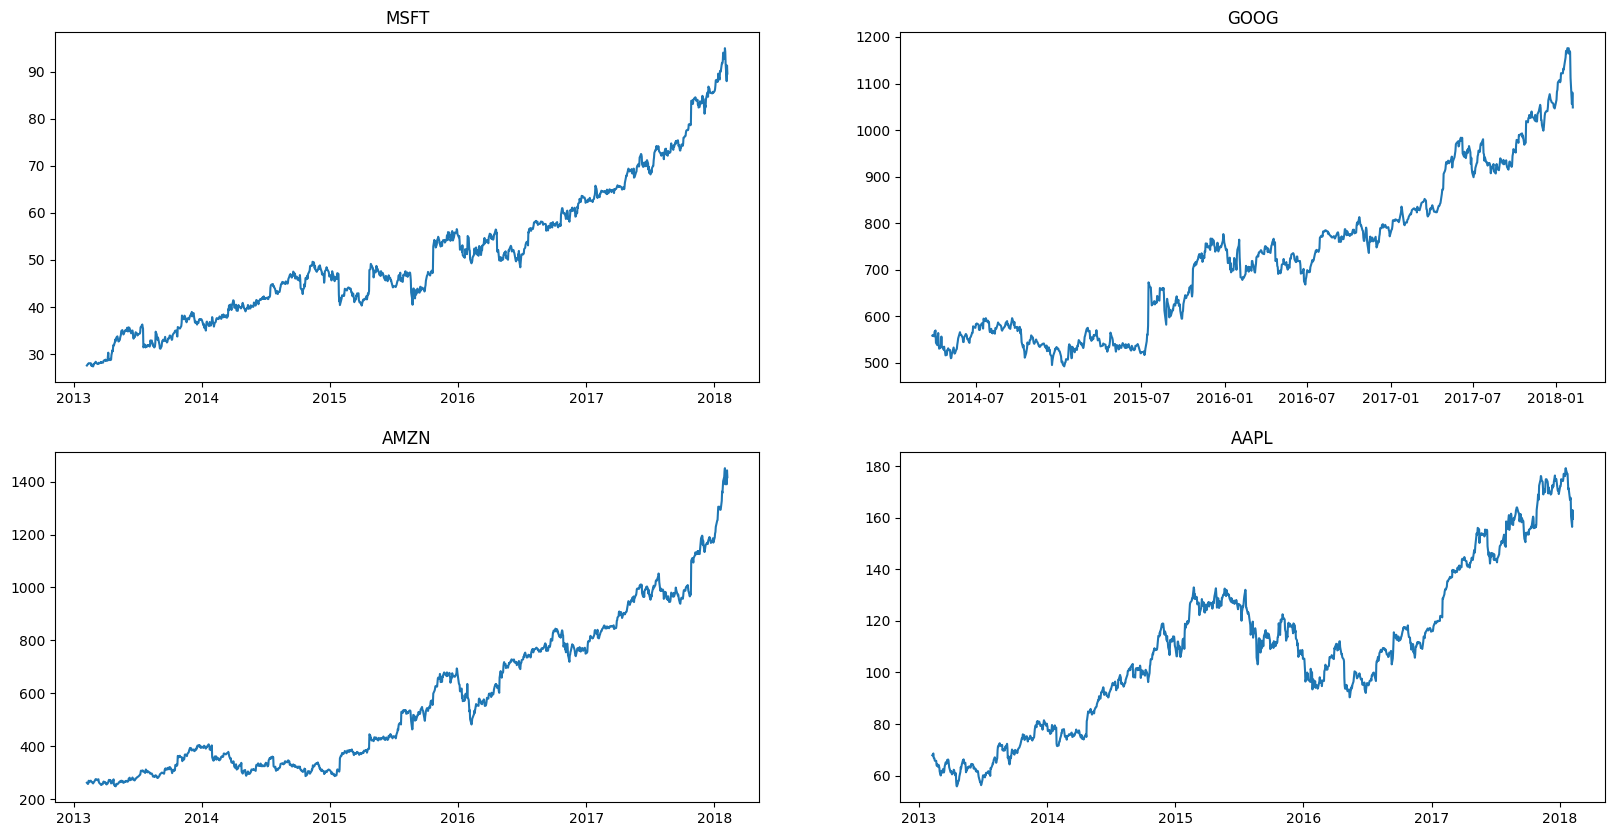

In [116]:
plt.figure(figsize = (20,10))
for index , company in enumerate(tech_list , 1):
    plt.subplot(2,2,index)
    filter1 = data['Name'] == company
    df = data[filter1]
    plt.plot(df['date'],df['close'])
    plt.title(company)

# Moving Average Of Various Stocks

In [117]:
data['close'].rolling(window = 10).mean().head(10)

0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
5        NaN
6        NaN
7        NaN
8        NaN
9    27.8535
Name: close, dtype: float64

In [118]:
new_data = data.copy()

In [119]:
window_parameter = [10,20,50]

In [120]:
for i in window_parameter:
    new_data['close '+ str(i)] = new_data['close'].rolling(i).mean()
new_data.tail()    

,date,open,high,low,close,volume,Name,close 10,close 20,close 50
4747,2018-02-01,167.165,168.62,166.7600,167.78,47230787,AAPL,171.948,173.8700,172.8252
4748,2018-02-02,166.000,166.80,160.1000,160.50,86593825,AAPL,170.152,173.2435,172.6356
4749,2018-02-05,159.100,163.88,156.0000,156.49,72738522,AAPL,168.101,172.3180,172.3026
4750,2018-02-06,154.830,163.72,154.0000,163.03,68243838,AAPL,166.700,171.7520,172.0640
4751,2018-02-07,163.085,163.40,159.0685,159.54,51608580,AAPL,165.232,171.0125,171.7554


In [121]:
new_data.set_index('date',inplace=True)

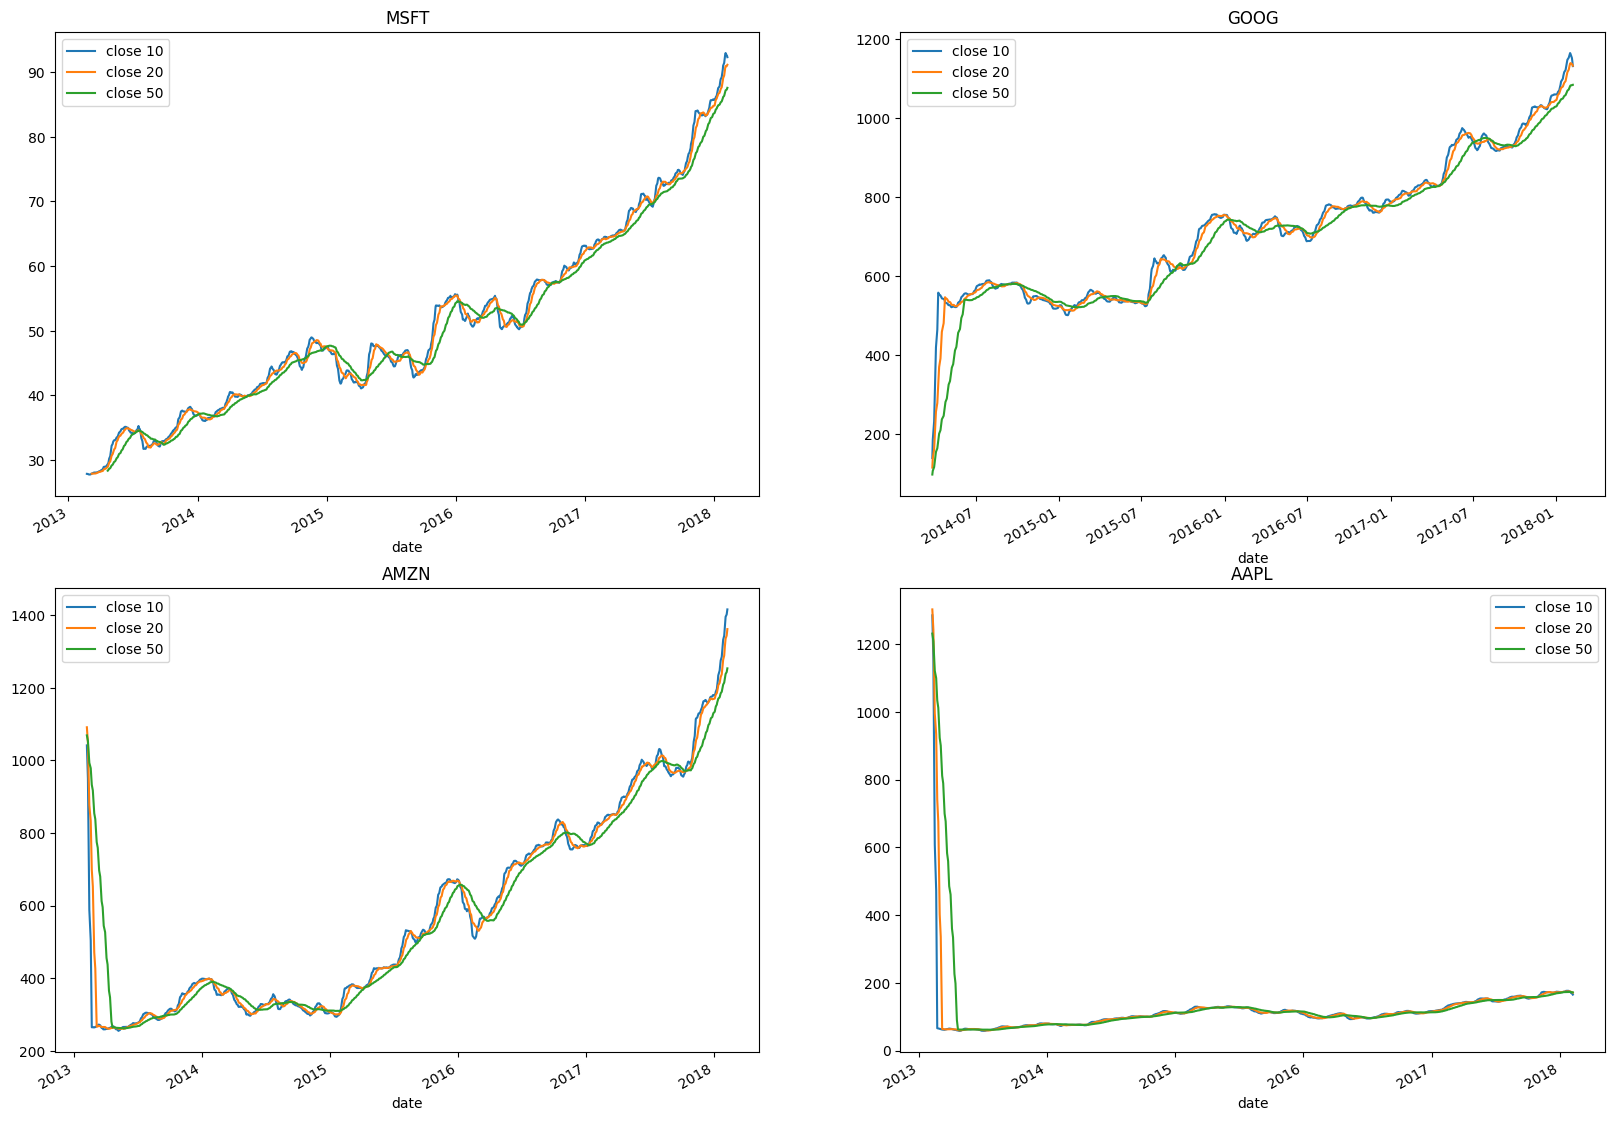

In [122]:
plt.figure(figsize = (20,15))
for index , company in enumerate(tech_list , 1):
    plt.subplot(2,2,index)
    filter1 = new_data['Name'] == company
    df = new_data[filter1]
    df[['close 10','close 20','close 50']].plot(ax=plt.gca())
    plt.title(company)

# Closing Price Change In Apple Stock

In [123]:
apple = pd.read_csv("C:\\Users\\sadee\\Downloads\\S&P_resources\\individual_stocks_5yr\\AAPL_data.csv")

In [124]:
apple.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL
1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL
2,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL
3,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL
4,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL


In [125]:
apple['close']

0        67.8542
1        68.5614
2        66.8428
3        66.7156
4        66.6556
          ...   
1254    167.7800
1255    160.5000
1256    156.4900
1257    163.0300
1258    159.5400
Name: close, Length: 1259, dtype: float64

In [126]:
apple['Daily Change'] = apple['close'].pct_change() * 100

In [127]:
apple.head()

,date,open,high,low,close,volume,Name,Daily Change
0,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL,NaN
1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL,1.042235
2,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL,-2.506658
3,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL,-0.190297
4,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL,-0.089934


In [138]:
import plotly.express as px
px.line(apple, x = 'date', y = 'Daily Change')

# Resampling Analysis Of Closing Price

In [129]:
apple.dtypes

date             object
open            float64
high            float64
low             float64
close           float64
volume            int64
Name             object
Daily Change    float64
dtype: object

In [130]:
apple2 = apple.copy()

In [131]:
apple2['date'] = pd.to_datetime(apple2['date'])

In [132]:
apple2.dtypes

date            datetime64[ns]
open                   float64
high                   float64
low                    float64
close                  float64
volume                   int64
Name                    object
Daily Change           float64
dtype: object

In [133]:
apple2.set_index('date',inplace = True)

In [134]:
apple2.head(10)

,open,high,low,close,volume,Name,Daily Change
date,,,,,,,
2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL,NaN
2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL,1.042235
2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL,-2.506658
2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL,-0.190297
2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL,-0.089934
2013-02-15,66.9785,67.1656,65.7028,65.7371,97924631,AAPL,-1.377979
2013-02-19,65.8714,66.1042,64.8356,65.7128,108854046,AAPL,-0.036965
2013-02-20,65.3842,65.3842,64.1142,64.1214,118891367,AAPL,-2.421750
2013-02-21,63.7142,64.1671,63.2599,63.7228,111596821,AAPL,-0.621633


<Axes: xlabel='date'>

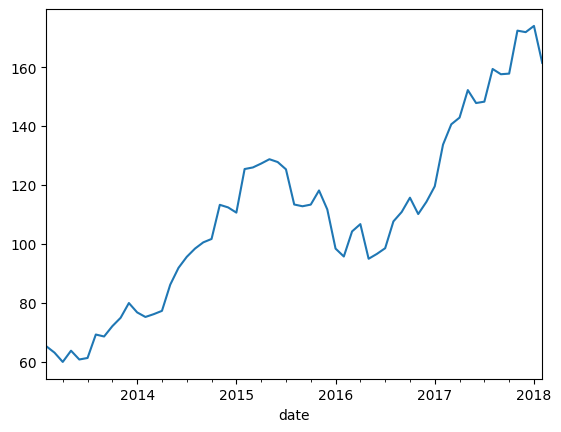

In [135]:
apple2['close'].resample('M').mean().plot()

<Axes: xlabel='date'>

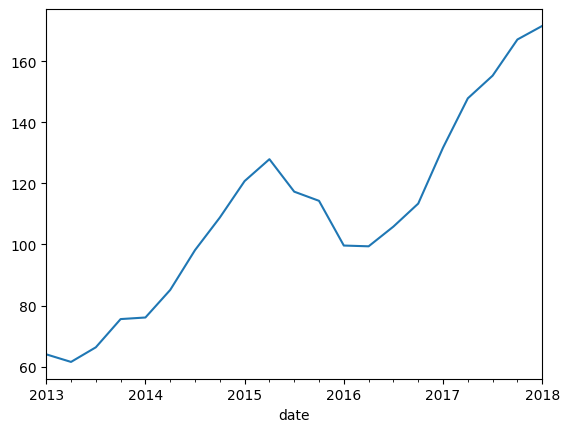

In [136]:
apple2['close'].resample('Q').mean().plot()

<Axes: xlabel='date'>

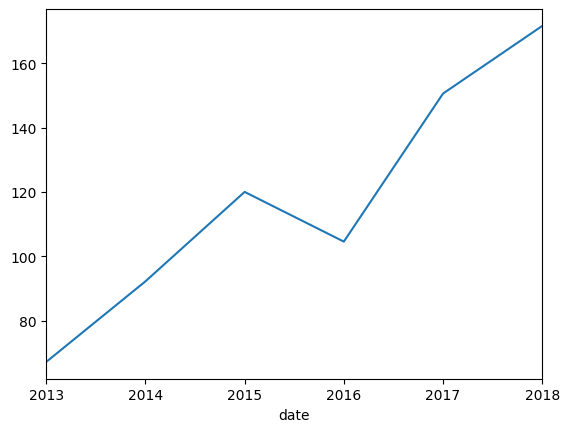

In [137]:
apple2['close'].resample('Y').mean().plot()

# Correlation Between Closing Prices

In [141]:
top_companies

['C:\\Users\\sadee\\Downloads\\S&P_resources\\individual_stocks_5yr\\AAPL_data.csv',
 'C:\\Users\\sadee\\Downloads\\S&P_resources\\individual_stocks_5yr\\AMZN_data.csv',
 'C:\\Users\\sadee\\Downloads\\S&P_resources\\individual_stocks_5yr\\GOOG_data.csv',
 'C:\\Users\\sadee\\Downloads\\S&P_resources\\individual_stocks_5yr\\MSFT_data.csv']

In [145]:
Apple = pd.read_csv(top_companies[0])
Amazon = pd.read_csv(top_companies[1])
Google = pd.read_csv(top_companies[2])
Microsoft = pd.read_csv(top_companies[3])

In [146]:
closing_price = pd.DataFrame()

In [147]:
closing_price["Apple"] = Apple['close']
closing_price["Amazon"] = Amazon['close']
closing_price["Google"] = Google['close']
closing_price["Microsoft"] = Microsoft['close']

In [155]:
closing_price.head()

,Apple,Amazon,Google,Microsoft
0,67.8542,261.95,558.46,27.55
1,68.5614,257.21,559.99,27.86
2,66.8428,258.70,556.97,27.88
3,66.7156,269.47,567.16,28.03
4,66.6556,269.24,567.00,28.04


In [150]:
closing_price.corr()

,Apple,Amazon,Google,Microsoft
Apple,1.000000,0.819078,0.640522,0.899689
Amazon,0.819078,1.000000,0.888456,0.955977
Google,0.640522,0.888456,1.000000,0.907011
Microsoft,0.899689,0.955977,0.907011,1.000000


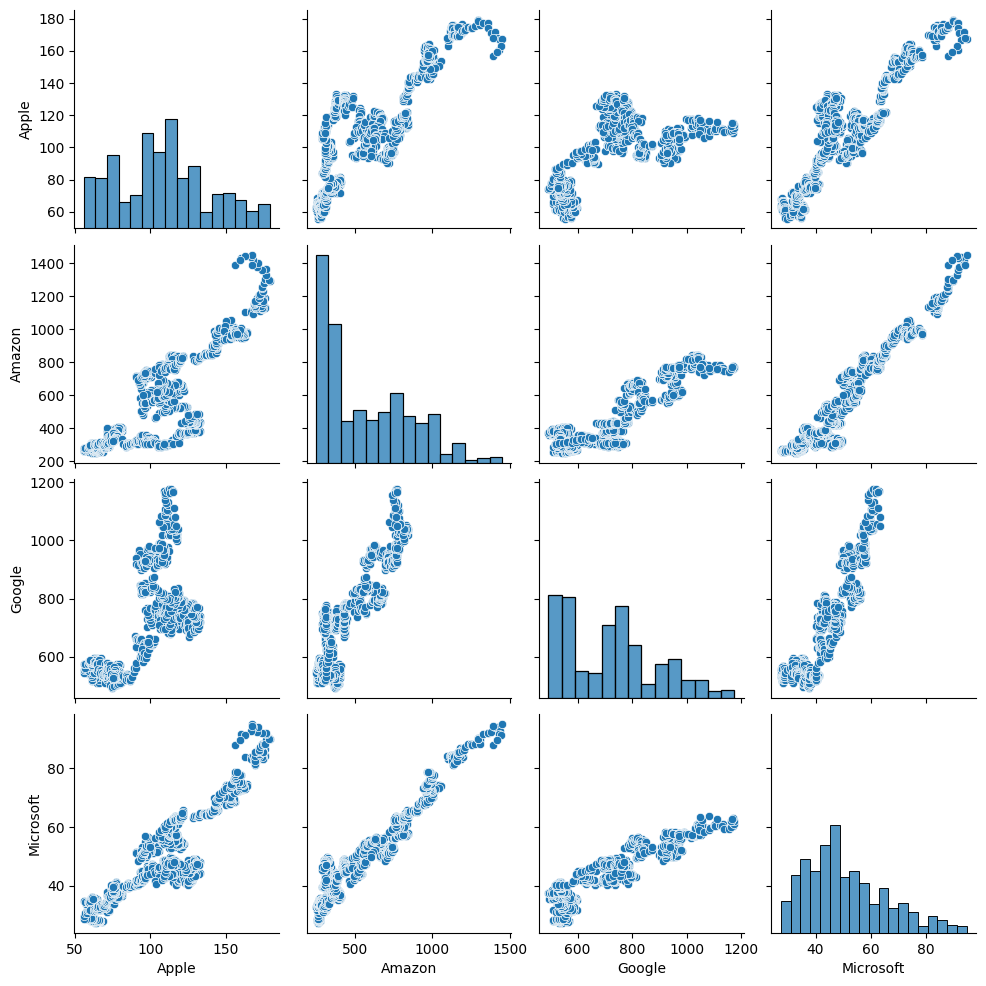

In [149]:
sns.pairplot(closing_price)

<Axes: >

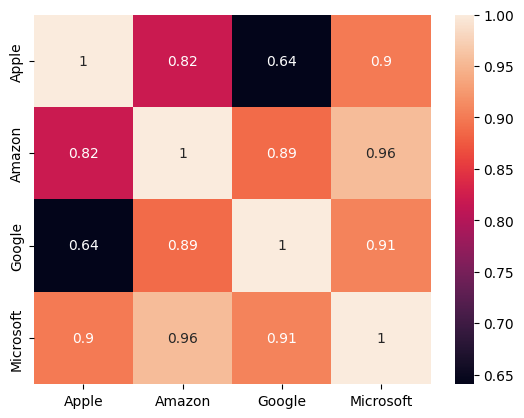

In [152]:
sns.heatmap(closing_price.corr(),annot = True)

In [158]:
closing_price['Apple % Change'] = closing_price['Apple'].pct_change() * 100
closing_price['Amazon % Change'] = closing_price['Amazon'].pct_change() * 100
closing_price['Google % Change'] = closing_price['Google'].pct_change() * 100
closing_price['Microsoft % Change'] = closing_price['Microsoft'].pct_change() * 100

In [159]:
closing_price

,Apple,Amazon,Google,Microsoft,Apple % Change,Amazon % Change,Google % Change,Microsoft % Change
0,67.8542,261.95,558.46,27.55,NaN,NaN,NaN,NaN
1,68.5614,257.21,559.99,27.86,1.042235,-1.809506,0.273968,1.125227
2,66.8428,258.70,556.97,27.88,-2.506658,0.579293,-0.539295,0.071788
3,66.7156,269.47,567.16,28.03,-0.190297,4.163123,1.829542,0.538020
4,66.6556,269.24,567.00,28.04,-0.089934,-0.085353,-0.028211,0.035676
...,...,...,...,...,...,...,...,...
1254,167.7800,1390.00,NaN,94.26,0.209043,-4.196734,0.000000,-0.789391
1255,160.5000,1429.95,NaN,91.78,-4.339015,2.874101,0.000000,-2.631021
1256,156.4900,1390.00,NaN,88.00,-2.498442,-2.793804,0.000000,-4.118544
1257,163.0300,1442.84,NaN,91.33,4.179181,3.801439,0.000000,3.784091


In [160]:
percent_change = closing_price[['Apple % Change','Amazon % Change','Google % Change','Microsoft % Change']]

In [161]:
percent_change

,Apple % Change,Amazon % Change,Google % Change,Microsoft % Change
0,NaN,NaN,NaN,NaN
1,1.042235,-1.809506,0.273968,1.125227
2,-2.506658,0.579293,-0.539295,0.071788
3,-0.190297,4.163123,1.829542,0.538020
4,-0.089934,-0.085353,-0.028211,0.035676
...,...,...,...,...
1254,0.209043,-4.196734,0.000000,-0.789391
1255,-4.339015,2.874101,0.000000,-2.631021
1256,-2.498442,-2.793804,0.000000,-4.118544
1257,4.179181,3.801439,0.000000,3.784091


In [169]:
percent_change.corr()

,Apple % Change,Amazon % Change,Google % Change,Microsoft % Change
Apple % Change,1.000000,0.287659,0.032996,0.366598
Amazon % Change,0.287659,1.000000,0.025323,0.402678
Google % Change,0.032996,0.025323,1.000000,0.036436
Microsoft % Change,0.366598,0.402678,0.036436,1.000000


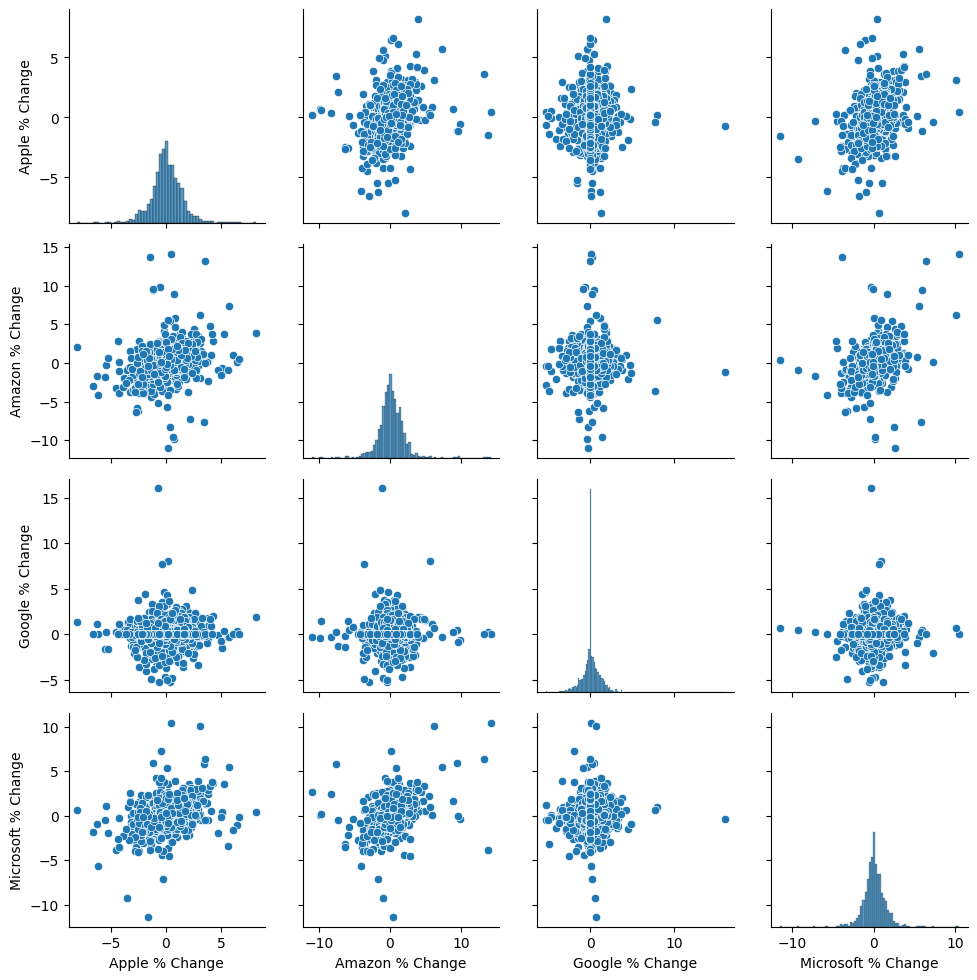

In [168]:
g = sns.PairGrid(data = percent_change)
g.map_diag(sns.histplot)
g.map_lower(sns.scatterplot)
g.map_upper(sns.scatterplot)